In [1]:
!nvidia-smi

Sun Jan 23 22:59:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install fastai

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from fastai.callbacks import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set path to root directory
path = Path('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged')
# View all files in directory
path.ls()

[PosixPath('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/.DS_Store'),
 PosixPath('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/train'),
 PosixPath('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/test'),
 PosixPath('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/val')]

In [ ]:
######## main function ############
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from fastai.callbacks import *

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()

data_dir = "/content/drive/MyDrive/damage_assess_sahaj/dataset/data/minor_moderate_severe"

# Set path to root directory
path = Path(data_dir)
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)
#show some images
data.show_batch()
plt.savefig(os.path.join(data_dir,'data_batch.png'))
clear_pyplot_memory()


classes = data.classes
num_classes = data.c

model_name = ["vgg16_bn" , "vgg19_bn" , "resnet50" , "densenet201"]

for model_i in model_name:

  if model_i == "vgg16_bn":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg16_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))
    
  elif model_i == "vgg19_bn":

    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "resnet50":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.resnet50, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "densenet201":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.densenet201, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(6, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))
  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.605567,0.948033,0.526316,0.525321,0.532408,0.524043,01:39
1,1.362441,0.942084,0.596491,0.586542,0.581122,0.587913,00:09
2,1.120140,0.934703,0.596491,0.583581,0.615690,0.576070,00:08
3,1.000277,0.979745,0.596491,0.585693,0.607488,0.580487,00:08


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.748265,0.998887,0.596491,0.583490,0.597049,0.583302,00:12
1,0.709995,1.006327,0.587719,0.575846,0.582145,0.574293,00:11


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.657654,1.051170,0.596491,0.580417,0.608489,0.580293,00:11
1,0.568198,0.973952,0.675439,0.667651,0.664621,0.668412,00:10
2,0.456128,0.946698,0.649123,0.636963,0.648455,0.634153,00:10
3,0.365372,0.938870,0.692982,0.685584,0.700250,0.682013,00:10


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.636847,0.900239,0.535088,0.528689,0.554252,0.527421,00:09
1,1.435038,1.117260,0.561404,0.558370,0.571106,0.555274,00:09
2,1.251902,0.952533,0.596491,0.594392,0.607864,0.591116,00:09
3,1.081192,1.005230,0.552632,0.545109,0.558554,0.541848,00:09


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.748398,1.034900,0.570175,0.563313,0.576118,0.561274,00:11
1,0.776926,1.042844,0.570175,0.561935,0.571170,0.559672,00:11


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.668176,1.407738,0.482456,0.484173,0.505174,0.488413,00:11
1,0.561043,1.113645,0.614035,0.599183,0.603484,0.598117,00:11
2,0.472014,1.265345,0.657895,0.659294,0.657238,0.659810,00:11
3,0.385056,1.208899,0.605263,0.602272,0.594108,0.604348,00:11


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.624631,1.382826,0.605263,0.600613,0.606129,0.605950,00:08
1,1.480412,1.380849,0.622807,0.630761,0.662317,0.623336,00:06
2,1.227099,1.003342,0.657895,0.649921,0.652117,0.649374,00:06
3,1.034285,1.017255,0.640351,0.631301,0.642589,0.628541,00:06


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.600009,1.017208,0.631579,0.622347,0.635281,0.621134,00:08
1,0.625330,1.023077,0.631579,0.623913,0.635281,0.621134,00:08


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.551217,1.085160,0.649123,0.640633,0.641538,0.641773,00:07
1,0.554925,1.586651,0.684211,0.673329,0.669795,0.674218,00:08
2,0.494070,1.163887,0.631579,0.637193,0.652982,0.633365,00:07
3,0.397279,1.042306,0.657895,0.666645,0.680760,0.663207,00:08


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.506465,1.009228,0.614035,0.588883,0.588054,0.602146,00:13
1,1.254751,1.149404,0.614035,0.595581,0.596702,0.595302,00:09
2,1.016532,1.034325,0.561404,0.541491,0.536125,0.542849,00:09
3,0.830124,0.957421,0.570175,0.556157,0.559791,0.555255,00:09


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.510499,0.950556,0.596491,0.581454,0.595960,0.580875,00:12
1,0.532875,0.958534,0.622807,0.612197,0.624839,0.609115,00:11


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.493866,1.108662,0.578947,0.568110,0.615463,0.571059,00:11
1,0.368745,1.508494,0.570175,0.559168,0.558703,0.559284,00:11
2,0.335174,1.437440,0.631579,0.621443,0.613112,0.623561,00:11
3,0.297551,1.270505,0.631579,0.623559,0.617225,0.625163,00:11
4,0.247105,1.127038,0.631579,0.622153,0.621377,0.622347,00:11
5,0.205322,1.090367,0.657895,0.649611,0.645731,0.650588,00:11


In [ ]:
######## main function ############
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from fastai.callbacks import *

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()

data_dir = "/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug1/minor_moderate_severe"

# Set path to root directory
path = Path(data_dir)
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)
#show some images
data.show_batch()
plt.savefig(os.path.join(data_dir,'data_batch.png'))
clear_pyplot_memory()


classes = data.classes
num_classes = data.c

model_name = ["vgg16_bn" , "vgg19_bn" , "resnet50" , "densenet201"]

for model_i in model_name:

  if model_i == "vgg16_bn":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg16_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))
    
  elif model_i == "vgg19_bn":

    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "resnet50":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.resnet50, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "densenet201":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.densenet201, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(6, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.549162,0.826883,0.643519,0.651147,0.639899,0.661953,02:07
1,1.161701,0.889923,0.671296,0.668774,0.666438,0.669360,00:15
2,0.921454,0.782150,0.736111,0.737650,0.737406,0.737710,00:14
3,0.751860,0.784648,0.731481,0.732528,0.734023,0.732155,00:14


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.624277,0.790978,0.726852,0.726439,0.729709,0.727104,00:18
1,0.591200,0.783979,0.731481,0.732528,0.734023,0.732155,00:18


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.501558,0.656346,0.768519,0.772676,0.770446,0.774747,00:17
1,0.357342,0.698072,0.763889,0.763537,0.767203,0.762626,00:18
2,0.256484,0.514662,0.833333,0.833272,0.831012,0.833838,00:18
3,0.178955,0.486328,0.842593,0.842820,0.845085,0.842256,00:18


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.458985,0.893823,0.592593,0.598995,0.590165,0.604545,00:15
1,1.142586,0.851365,0.652778,0.650530,0.658843,0.648485,00:15
2,0.877668,0.829467,0.652778,0.651337,0.660899,0.648990,00:15
3,0.757601,0.773728,0.689815,0.692154,0.691745,0.692256,00:15


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.558385,0.770256,0.675926,0.676302,0.677222,0.676094,00:20
1,0.574464,0.773118,0.675926,0.675922,0.688306,0.672896,00:20


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.426914,0.661182,0.759259,0.762035,0.760460,0.765320,00:20
1,0.353618,1.229709,0.703704,0.719389,0.728399,0.717172,00:20
2,0.279129,0.542139,0.805556,0.811134,0.807209,0.812121,00:20
3,0.189903,0.512988,0.833333,0.837034,0.835007,0.837542,00:20


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.402731,1.435985,0.689815,0.678695,0.706988,0.685690,00:12
1,1.045557,0.857230,0.731481,0.730162,0.728927,0.730471,00:11
2,0.764348,0.719880,0.759259,0.761329,0.755524,0.762795,00:11
3,0.600523,0.675542,0.787037,0.782118,0.781300,0.782323,00:12


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.381161,0.674462,0.787037,0.781700,0.781300,0.782323,00:12
1,0.402899,0.668113,0.777778,0.774878,0.771377,0.775758,00:12


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.332998,0.803962,0.773148,0.775783,0.771012,0.782323,00:12
1,0.334903,0.990817,0.745370,0.736717,0.751984,0.732997,00:13
2,0.287363,0.809971,0.777778,0.783890,0.775455,0.786027,00:12
3,0.195524,0.718157,0.787037,0.789266,0.787413,0.789731,00:13


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.355639,0.768867,0.736111,0.736076,0.732824,0.740404,00:18
1,0.936265,0.763967,0.736111,0.725649,0.724544,0.725926,00:16
2,0.662198,0.592304,0.773148,0.766760,0.763779,0.767508,00:16
3,0.489345,0.580261,0.791667,0.784839,0.784127,0.785017,00:16


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.271700,0.589427,0.800926,0.793912,0.795075,0.793771,00:20
1,0.281311,0.584620,0.805556,0.798917,0.799299,0.798822,00:19


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.219521,0.654918,0.787037,0.777371,0.790133,0.778283,00:19
1,0.220517,0.675357,0.810185,0.805697,0.814461,0.803535,00:19
2,0.219166,0.702422,0.796296,0.799132,0.796347,0.799832,00:19
3,0.175433,0.558657,0.847222,0.857218,0.849809,0.859091,00:20
4,0.123561,0.507439,0.861111,0.866947,0.859397,0.868855,00:19
5,0.085305,0.485827,0.865741,0.866979,0.864866,0.867508,00:19


In [ ]:
######## main function ############
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
from fastai.callbacks import *

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()

data_dir = "/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug2/minor_moderate_severe"

# Set path to root directory
path = Path(data_dir)
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)
#show some images
data.show_batch()
plt.savefig(os.path.join(data_dir,'data_batch.png'))
clear_pyplot_memory()


classes = data.classes
num_classes = data.c

model_name = ["vgg16_bn" , "vgg19_bn" , "resnet50" , "densenet201"]

for model_i in model_name:

  if model_i == "vgg16_bn":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg16_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))
    
  elif model_i == "vgg19_bn":

    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "resnet50":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.resnet50, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))

  elif model_i == "densenet201":
    # Build the CNN model with the pretrained resnet34
    learn = cnn_learner(data, models.densenet201, metrics = [accuracy, FBeta(), Precision(), Recall()],callback_fns=[CSVLogger])
    # Train the model on 4 epochs of data at the default learning rate
    learn.fit_one_cycle(4)
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'fc_training.csv')) 

    # Save the model
    learn.save(model_i+ "_"+ 'stage-1')

    # Unfreeze all layers of the CNN
    learn.unfreeze()
    
    #full layer training
    learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
    learn.fit_one_cycle(6, max_lr=slice(1e-4, 1e-3))
    learn.csv_logger.read_logged_file()

    os.rename(os.path.join(data_dir,'history.csv'),os.path.join(data_dir,model_i+"_"+'full_training.csv'))

    # Rebuild interpreter and replot confusion matrix
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
    plt.savefig(os.path.join(data_dir,model_i+"_"+'cm_val.png'))
    clear_pyplot_memory()

    # Save the model
    learn.save(model_i+ "_" + 'stage-2')

    interp.plot_top_losses(9, figsize=(15,11))
    plt.savefig(os.path.join(data_dir,model_i+"_"+'top_losses.png'))
    clear_pyplot_memory()

    #exporting the file
    learn.export()
    os.rename(os.path.join(data_dir,'export.pkl'),os.path.join(data_dir,model_i+"_"+'export.pkl'))
  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.499288,0.875240,0.648148,0.658747,0.664518,0.672896,02:07
1,1.135577,0.954311,0.694444,0.694041,0.692430,0.694444,00:14
2,0.936843,0.785497,0.736111,0.730399,0.734857,0.729293,00:14
3,0.779102,0.749291,0.736111,0.728184,0.738751,0.725589,00:14


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.616244,0.746796,0.731481,0.722649,0.731659,0.722391,00:18
1,0.607628,0.740084,0.731481,0.722966,0.732842,0.720539,00:18


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.523180,0.640440,0.787037,0.779988,0.789242,0.780135,00:18
1,0.381292,0.645085,0.791667,0.790924,0.799170,0.788889,00:18
2,0.272034,0.549736,0.837963,0.840877,0.838065,0.841583,00:18
3,0.185170,0.480141,0.842593,0.842792,0.846299,0.841919,00:17


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.488169,0.899665,0.657407,0.658173,0.662930,0.669360,00:15
1,1.169001,0.856211,0.722222,0.721402,0.717475,0.722391,00:15
2,0.920514,0.731570,0.740741,0.738887,0.734868,0.739899,00:15
3,0.761884,0.689324,0.759259,0.752657,0.753857,0.752357,00:15


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.605621,0.689930,0.754630,0.748656,0.748950,0.749158,00:20
1,0.584327,0.702159,0.740741,0.737261,0.734133,0.738047,00:20


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.477193,0.656762,0.763889,0.761934,0.766189,0.761785,00:20
1,0.373784,0.729552,0.791667,0.790192,0.792043,0.789731,00:20
2,0.272010,0.592534,0.796296,0.801385,0.794868,0.803030,00:20
3,0.183765,0.536257,0.800926,0.806208,0.798802,0.808081,00:20


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.404904,1.333435,0.657407,0.654008,0.657282,0.661111,00:11
1,1.092963,0.820434,0.740741,0.739799,0.734069,0.741246,00:11
2,0.806773,0.787184,0.712963,0.707040,0.704904,0.707576,00:11
3,0.614028,0.743306,0.745370,0.742217,0.742735,0.742088,00:12


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.396599,0.746782,0.745370,0.740932,0.741969,0.740741,00:12
1,0.404998,0.742276,0.750000,0.747379,0.746322,0.747643,00:12


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.337497,0.856435,0.791667,0.778986,0.795200,0.784007,00:12
1,0.351658,0.934054,0.722222,0.722653,0.718348,0.723737,00:12
2,0.273453,0.613501,0.833333,0.835121,0.832854,0.835690,00:13
3,0.193631,0.485374,0.828704,0.826428,0.827763,0.826094,00:12


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,1.321589,0.777281,0.750000,0.746580,0.748457,0.749663,00:16
1,1.002074,0.731157,0.754630,0.747861,0.744707,0.748653,00:16
2,0.709153,0.543244,0.814815,0.808952,0.823533,0.805387,00:16
3,0.514806,0.501515,0.828704,0.825544,0.828746,0.824748,00:16


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.280003,0.498714,0.828704,0.826254,0.827515,0.826094,00:20
1,0.289578,0.500655,0.824074,0.819989,0.823191,0.819192,00:19


epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.252162,0.516990,0.842593,0.839730,0.847966,0.839562,00:19
1,0.198622,0.794640,0.805556,0.801601,0.824265,0.796128,00:19
2,0.213462,0.690994,0.814815,0.811547,0.817382,0.810101,00:20
3,0.184122,0.595010,0.870370,0.871107,0.868674,0.871717,00:19
4,0.127421,0.572325,0.856481,0.860641,0.854770,0.862121,00:19
5,0.090228,0.528691,0.851852,0.851209,0.852006,0.851010,00:19


In [ ]:
#data preprocessing
data = ImageDataBunch.from_folder(path, train='train', valid='val', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

In [ ]:
path

PosixPath('/content/drive/MyDrive/damage_assess_sahaj/car_damaged')

In [ ]:
# Show what the data looks like after being transformed
data.show_batch()
plt.savefig(os.path.join("/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged",'sample.png'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# See the classes and count of classes in your dataset
print(data.classes,data.c)


['damage', 'not_damaged'] 2


In [ ]:
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

1840 230


In [ ]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics = [accuracy],callback_fns=[CSVLogger])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(4)
learn.csv_logger.read_logged_file()

epoch,train_loss,valid_loss,accuracy,time
0,0.607540,0.342237,0.891304,00:16
1,0.485318,0.192753,0.913043,00:15
2,0.367298,0.186528,0.917391,00:16
3,0.286521,0.180017,0.921739,00:16


,epoch,train_loss,valid_loss,accuracy,time
0,0,0.607540,0.342237,0.891304,00:16
1,1,0.485318,0.192753,0.913043,00:15
2,2,0.367298,0.186528,0.917391,00:16
3,3,0.286521,0.180017,0.921739,00:16


In [ ]:
# Save the model
learn.save('resnet_'+'stage-1')
# Load the Model
learn.load('resnet_'+'stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged;

Valid: LabelList (230 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3),

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 3.31E-05


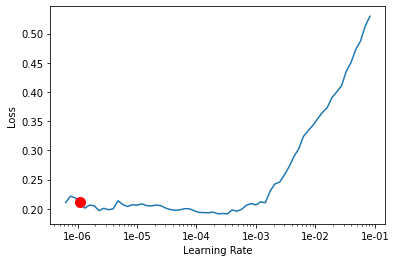

In [ ]:
#finding optimum learning rate
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))


epoch,train_loss,valid_loss,accuracy,time
0,0.206051,0.190148,0.921739,00:16
1,0.200983,0.188458,0.921739,00:16


In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.208006,0.547822,0.817391,00:20
1,0.199075,0.241500,0.939130,00:20
2,0.143733,0.152227,0.934783,00:20
3,0.103755,0.156253,0.943478,00:19


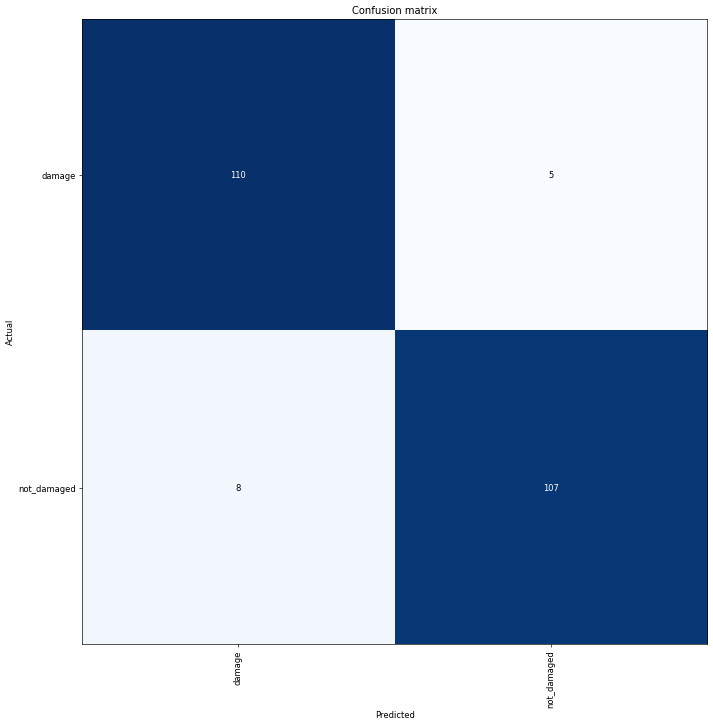

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
#text version of cm
interp.most_confused(min_val=2)

[('not_damaged', 'damage', 8), ('damage', 'not_damaged', 5)]

In [ ]:
# Save the model
learn.save('stage-2')

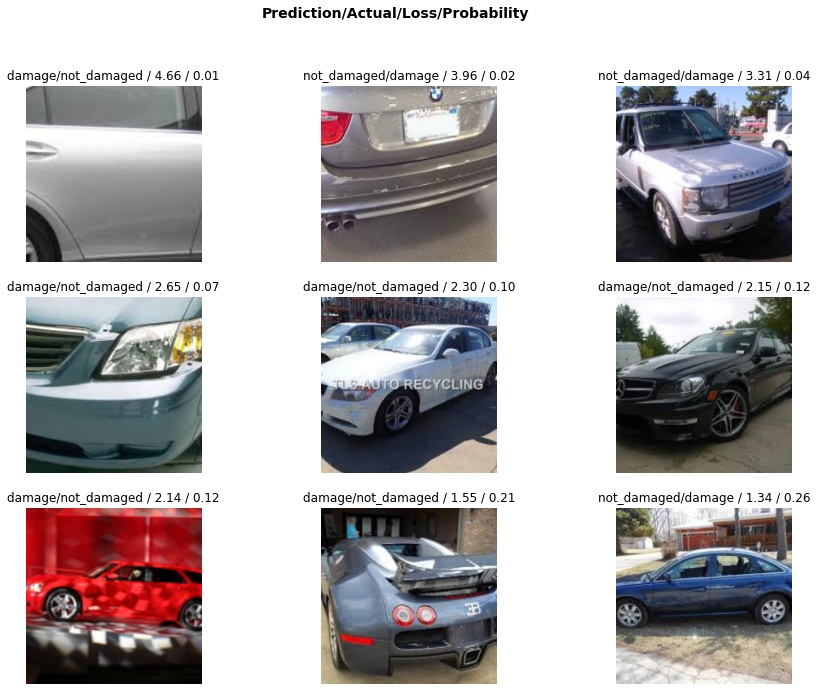

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
######################## done resnet 34########

In [ ]:
#doing the same for vgg19

In [ ]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.vgg19_bn, metrics = [accuracy])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.585801,0.294291,0.908696,02:17
1,0.415532,0.244309,0.895652,00:19
2,0.332963,0.220040,0.917391,00:20
3,0.277168,0.205085,0.934783,00:20


In [ ]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')


Learner(data=ImageDataBunch;

Train: LabelList (1840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/car_damaged;

Valid: LabelList (230 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/car_damaged;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplac

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 4.79E-05


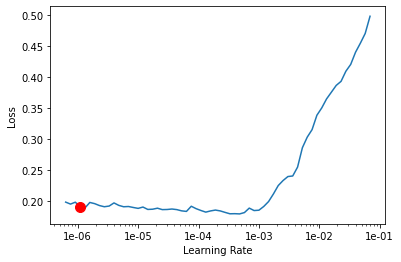

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))
csv_logger = CSVLogger('training.log')
learn.csv_logger.read_logged_file()


epoch,train_loss,valid_loss,accuracy,time
0,0.197494,0.180032,0.917391,00:16
1,0.203304,0.182197,0.917391,00:16


TypeError: ignored

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.178494,0.269782,0.921739,00:23
1,0.192085,0.232653,0.921739,00:22
2,0.143528,0.266902,0.926087,00:23
3,0.107874,0.199364,0.926087,00:24


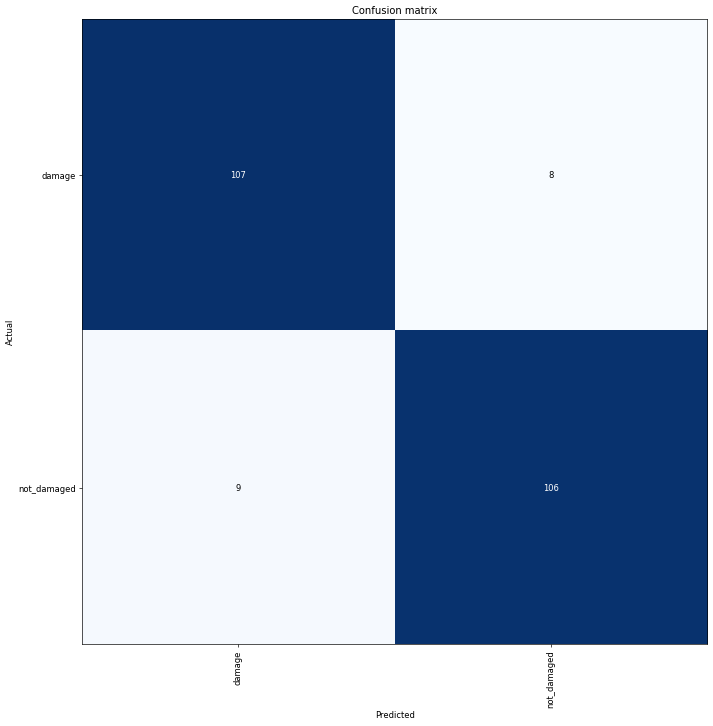

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Save the model
learn.save('stage-2')

In [ ]:
#doing the same for densenet201

In [ ]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.densenet201, metrics = [accuracy , FBeta(), Precision(), Recall()])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.505737,0.186082,0.917391,0.925606,0.906780,0.930435,00:20
1,0.369258,0.226313,0.913043,0.940171,0.880000,0.956522,00:20
2,0.270186,0.177288,0.939130,0.939130,0.939130,0.939130,00:21
3,0.208251,0.177043,0.939130,0.944541,0.931624,0.947826,00:20
4,0.152948,0.152610,0.939130,0.939130,0.939130,0.939130,00:21
5,0.116862,0.154239,0.943478,0.929825,0.963636,0.921739,00:20


In [ ]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1840 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/car_damaged;

Valid: LabelList (230 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
damage,damage,damage,damage,damage
Path: /content/drive/MyDrive/damage_assess_sahaj/car_damaged;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
      

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 3.02E-06


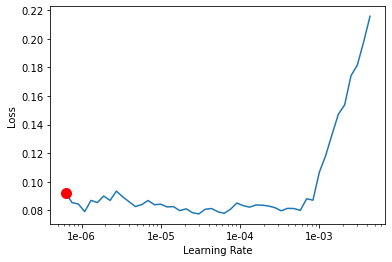

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.077010,0.152750,0.943478,0.929825,0.963636,0.921739,00:23
1,0.080564,0.149252,0.943478,0.940767,0.947368,0.939130,00:24


In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy,f_beta,precision,recall,time
0,0.101498,0.253680,0.913043,0.896309,0.935780,0.886957,00:23
1,0.144545,0.182384,0.934783,0.932056,0.938596,0.930435,00:24
2,0.116967,0.152359,0.943478,0.940767,0.947368,0.939130,00:23
3,0.078468,0.136469,0.947826,0.953206,0.940171,0.956522,00:23


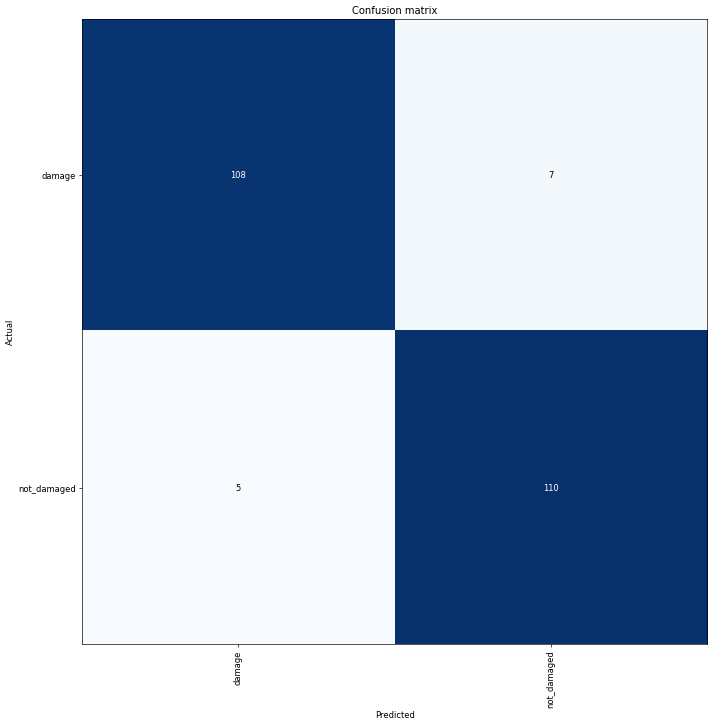

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Save the model
learn.save('stage-2')

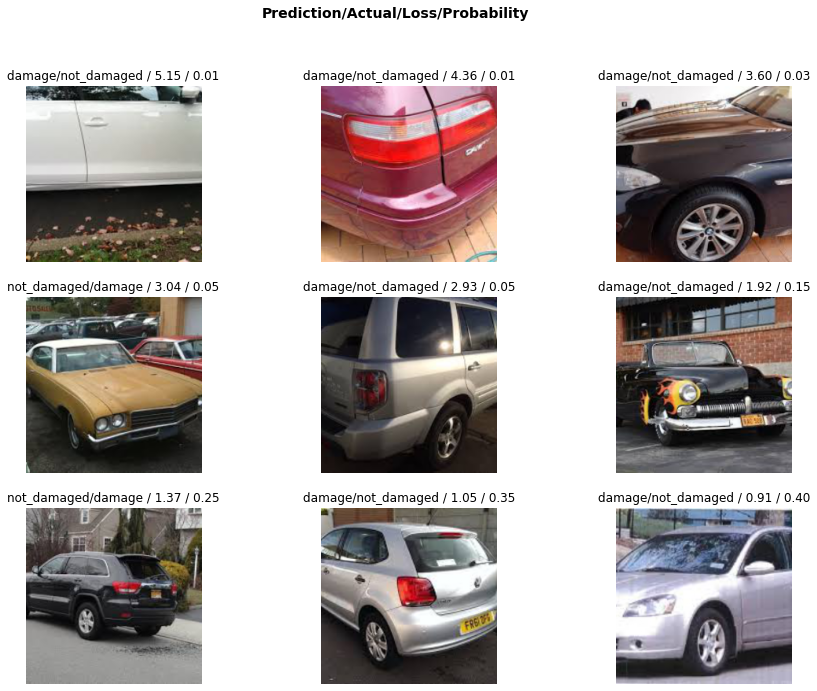

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.most_confused()

[('damage', 'not_damaged', 7), ('not_damaged', 'damage', 5)]

In [ ]:
#multilabel classification

In [ ]:
def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()


In [4]:
#inference on images

In [5]:
from PIL import Image as PImage
from fastai.vision import *
import cv2

In [79]:
path = Path('/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug1/car_damaged')
path1 = Path('/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug1/front_rear_side')
path2 = Path('/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug1/minor_moderate_severe')

In [80]:
from fastai.vision import Path,load_learner,Image

learn_damaged_notdamaged = load_learner(path , 'resnet50_export.pkl')
learn_frs = load_learner(path1,'vgg16_bn_export.pkl')
learn_di = load_learner(path2,'densenet201_export.pkl')

In [37]:
p = cv2.imread('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/test/damage/0115.JPEG') # p is numpy array with shape (height,width,channels)
t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
#t = t.permute(2,0,1) # Move num_channels as first dimension
t = t.float()/255. #Convert to float
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
a= learn_damaged_notdamaged.predict(im)

In [43]:
int(a[1])

int

In [ ]:
p = cv2.imread('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side/test/rear/0132.JPEG') # p is numpy array with shape (height,width,channels)
t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
#t = t.permute(2,0,1) # Move num_channels as first dimension
t = t.float()/255. #Convert to float
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
learn_damaged_notdamaged.predict(im)

(Category tensor(0), tensor(0), tensor([9.9994e-01, 6.0645e-05]))

In [ ]:
#frs
p = cv2.imread('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side/test/rear/0132.JPEG') # p is numpy array with shape (height,width,channels)
t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
t = t.float()/255. #Convert to float
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
learn_frs.predict(im)

(Category tensor(1), tensor(1), tensor([0.0228, 0.8242, 0.1530]))

In [ ]:
#damage intensity
p = cv2.imread('/content/drive/MyDrive/damage_assess_sahaj/dataset/data_aug1/minor_moderate_severe/test/severe/0127.JPEG') # p is numpy array with shape (height,width,channels)
t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
t = t.float()/255. #Convert to float
im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
learn_di.predict(im)

(Category tensor(2), tensor(2), tensor([5.0158e-08, 1.1977e-06, 1.0000e+00]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
#test image check

In [18]:
import os , sys, glob
import pandas as pd

In [21]:
car_damage = ['damage' , 'not_damaged']
final_result =[]
for idx,i in enumerate(car_damage):
  files = glob.glob(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/test' , i)+'/*')
  for file in files:
    result={}
    result["name"] = file
    result["gt"] = idx
    final_result.append(result)


df = pd.DataFrame(final_result)
df.to_csv(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/', 'car_damage_test.csv'))

In [23]:
frs = ['front' , 'rear' , 'side']
final_result =[]
for idx,i in enumerate(frs):
  files = glob.glob(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side/test' , i)+'/*')
  for file in files:
    result={}
    result["name"] = file
    result["gt"] = idx
    final_result.append(result)


df = pd.DataFrame(final_result)
df.to_csv(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side', 'frs_test.csv'))

In [26]:
intensity = ['minor' , 'moderate' , 'severe']
final_result =[]
for idx,i in enumerate(intensity):
  files = glob.glob(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/minor_moderate_severe/test' , i)+'/*')
  for file in files:
    result={}
    result["name"] = file
    result["gt"] = idx
    final_result.append(result)


df = pd.DataFrame(final_result)
df.to_csv(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/minor_moderate_severe', 'intensity_test.csv'))

In [30]:
df_damaged = pd.read_csv('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/car_damage_test.csv')
df_damaged

,Unnamed: 0,name,gt
0,0,/content/drive/MyDrive/damage_assess_sahaj/dat...,0
1,1,/content/drive/MyDrive/damage_assess_sahaj/dat...,0
2,2,/content/drive/MyDrive/damage_assess_sahaj/dat...,0
3,3,/content/drive/MyDrive/damage_assess_sahaj/dat...,0
4,4,/content/drive/MyDrive/damage_assess_sahaj/dat...,0
...,...,...,...
225,225,/content/drive/MyDrive/damage_assess_sahaj/dat...,1
226,226,/content/drive/MyDrive/damage_assess_sahaj/dat...,1
227,227,/content/drive/MyDrive/damage_assess_sahaj/dat...,1
228,228,/content/drive/MyDrive/damage_assess_sahaj/dat...,1


In [53]:
y_pred =[]
for idx , row in df_damaged.iterrows():
  file_name = row["name"]
  p = cv2.imread(file_name) # p is numpy array with shape (height,width,channels)
  t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
  t = t.float()/255. #Convert to float
  im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
  pred = learn_damaged_notdamaged.predict(im)
  y_pred.append(int(pred[1]))

In [54]:
y_gt = list(df_damaged["gt"])


In [64]:
import matplotlib.pyplot as plt

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_gt, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       115
           1       0.97      0.88      0.92       115

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230



In [59]:
print(confusion_matrix(y_gt, y_pred))

[[112   3]
 [ 14 101]]


In [65]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_gt, y_pred)).rename(columns={0:'damaged',1:'not_damaged'}, index={0:'damaged',1:'not_damaged'})
fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax,fmt='g')
plt.savefig(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged','damage'+"_"+'cm_test.png'))
clear_pyplot_memory()

In [82]:
df_damaged = pd.read_csv('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged/car_damage_test.csv')
y_pred =[]
for idx , row in df_damaged.iterrows():
  file_name = row["name"]
  p = cv2.imread(file_name) # p is numpy array with shape (height,width,channels)
  t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
  t = t.float()/255. #Convert to float
  im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
  pred = learn_damaged_notdamaged.predict(im)
  y_pred.append(int(pred[1]))
y_gt = list(df_damaged["gt"])
import matplotlib.pyplot as plt

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_gt, y_pred))
print(confusion_matrix(y_gt, y_pred))
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_gt, y_pred)).rename(columns={0:'damaged',1:'not_damaged'}, index={0:'damaged',1:'not_damaged'})
fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax,fmt='g')
plt.savefig(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/car_damaged','damage'+"_"+'cm_test.png'))
clear_pyplot_memory()

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       115
           1       0.94      0.90      0.92       115

    accuracy                           0.92       230
   macro avg       0.92      0.92      0.92       230
weighted avg       0.92      0.92      0.92       230

[[109   6]
 [ 12 103]]


In [83]:
df_frs = pd.read_csv('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side/frs_test.csv')
y_pred =[]
for idx , row in df_frs.iterrows():
  file_name = row["name"]
  p = cv2.imread(file_name) # p is numpy array with shape (height,width,channels)
  t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
  t = t.float()/255. #Convert to float
  im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
  pred = learn_frs.predict(im)
  y_pred.append(int(pred[1]))
y_gt = list(df_frs["gt"])
import matplotlib.pyplot as plt

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_gt, y_pred))
print(confusion_matrix(y_gt, y_pred))
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_gt, y_pred)).rename(columns={0:'front',1:'rear' , 2: 'side'}, index={0:'front',1:'rear' , 2: 'side'})
fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax,fmt='g')
plt.savefig(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/front_rear_side','frs'+"_"+'cm_test.png'))
clear_pyplot_memory()

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        47
           1       0.79      0.66      0.72        35
           2       0.71      0.77      0.74        31

    accuracy                           0.79       113
   macro avg       0.78      0.77      0.77       113
weighted avg       0.79      0.79      0.79       113

[[42  2  3]
 [ 5 23  7]
 [ 3  4 24]]


In [84]:
df_intensity = pd.read_csv('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/minor_moderate_severe/intensity_test.csv')
y_pred =[]
for idx , row in df_intensity.iterrows():
  file_name = row["name"]
  p = cv2.imread(file_name) # p is numpy array with shape (height,width,channels)
  t = pil2tensor(p, dtype=np.uint8) # converts to numpy tensor
  t = t.float()/255. #Convert to float
  im = Image(t) # Convert to fastAi Image - this class has "apply_tfms"
  pred = learn_di.predict(im)
  y_pred.append(int(pred[1]))
y_gt = list(df_intensity["gt"])
import matplotlib.pyplot as plt

def clear_pyplot_memory():
    plt.clf()
    plt.cla()
    plt.close()
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(classification_report(y_gt, y_pred))
print(confusion_matrix(y_gt, y_pred))
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_gt, y_pred)).rename(columns={0:'minor',1:'moderate' , 2: 'severe'}, index={0:'minor',1:'moderate' , 2: 'severe'})
fig, ax = plt.subplots(figsize=(7,5))         
sns.heatmap(confusion_matrix_df, annot=True, ax=ax,fmt='g')
plt.savefig(os.path.join('/content/drive/MyDrive/damage_assess_sahaj/dataset/data/minor_moderate_severe','intensity'+"_"+'cm_test.png'))
clear_pyplot_memory()

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        34
           1       0.60      0.68      0.63        37
           2       0.89      0.87      0.88        46

    accuracy                           0.74       117
   macro avg       0.74      0.73      0.73       117
weighted avg       0.75      0.74      0.75       117

[[22 12  0]
 [ 7 25  5]
 [ 1  5 40]]
